In [56]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs4

In [57]:
continents_page = requests.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents").text

In [58]:
continents_countries_soup = bs4(continents_page, "lxml")
continents = continents_countries_soup.find_all("div" > "h2", {"class": "mw-heading2"})
continents

[<div class="mw-heading mw-heading2"><h2 id="Africa">Africa</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="Asia">Asia</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="Europe">Europe</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="North_America">North America</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="South_America">South America</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="Oceania">Oceania</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="Notes">Notes</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="References">References</h2></div>,
 <div class="mw-heading mw-heading2"><h2 id="Other_website">Other website</h2></div>]

In [59]:
unwanted_words = ["Antarctica", "References", "Other website", "Notes"]
target_continents =[continent.text for continent in continents if continent.text not in unwanted_words]
target_continents

['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

In [60]:
ol_html = continents_countries_soup.find_all("tr")
all_countries = [countries.find_all("td",{"class": None, "id": None}) for countries in ol_html]

In [61]:

flat_country_list = []

for continent_data in all_countries:
    if continent_data:
        for i in range(0, len(continent_data), 8):
            try:
                country_cell = continent_data[i+2] 
                link = country_cell.find("a")
                if link:
                    flat_country_list.append(link.text.strip())
            except IndexError:
                continue


split_sizes = [60, 46, 47, 23, 12, 16]

countries_in_continents = []
start = 0

for size in split_sizes:
    end = start + size
    countries_in_continents.append(flat_country_list[start:end])
    start = end

countries_in_continents

[['Algeria',
  'Angola',
  'Benin',
  'Botswana',
  'Burkina Faso',
  'Burundi',
  'Cameroon',
  'Cape Verde',
  'Central African Republic',
  'Chad',
  'Comoros',
  'Democratic Congo',
  'Congo',
  'Djibouti',
  'Egypt',
  'Equatorial Guinea',
  'Eritrea',
  'Eswatini',
  'Ethiopia',
  'Gabon',
  'Gambia',
  'Ghana',
  'Guinea',
  'Guinea-Bissau',
  "Côte d'Ivoire",
  'Kenya',
  'Lesotho',
  'Liberia',
  'Libya',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Niger',
  'Nigeria',
  'Rwanda',
  'São Tomé and Príncipe',
  'Senegal',
  'Seychelles',
  'Sierra Leone',
  'Somalia',
  'South Africa',
  'South Sudan',
  'Sudan',
  'Tanzania',
  'Togo',
  'Tunisia',
  'Uganda',
  'Zambia',
  'Zimbabwe',
  'Santa Cruz de Tenerife',
  'Saint-Pierre',
  'Funchal',
  'Mamoudzou',
  'Saint-Denis',
  'Jamestown'],
 ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'Chin

In [62]:
countries_continents_category_df = pd.DataFrame(
    zip(countries_in_continents, target_continents), columns=["Countries", "Continents"]

)

countries_continents_category_df

,Countries,Continents
0,"[Algeria, Angola, Benin, Botswana, Burkina Fas...",Africa
1,"[Afghanistan, Armenia, Azerbaijan, Bahrain, Ba...",Asia
2,"[Albania, Andorra, Austria, Belarus, Belgium, ...",Europe
3,"[Antigua and Barbuda, The Bahamas, Barbados, B...",North America
4,"[Argentina, Bolivia, Brazil, Chile, Colombia, ...",South America
5,"[Australia, Cook Islands, Federated States of ...",Oceania


In [63]:
countries_continents_category_df = countries_continents_category_df.explode("Countries").reset_index(drop=True)
countries_continents_category_df

,Countries,Continents
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa
...,...,...
199,Samoa,Oceania
200,Solomon Islands,Oceania
201,Tonga,Oceania
202,Tuvalu,Oceania


In [64]:
countries_score_page = requests.get("https://en.wikipedia.org/wiki/World_Happiness_Report")
coutries_score_soup = bs4(countries_score_page.content, "lxml")

In [65]:
countries_score_table = coutries_score_soup.find_all("table", {"class": "wikitable"})

In [66]:
print(f"Jumlah tabel dengan class 'wikitable': {len(countries_score_table)}")

Jumlah tabel dengan class 'wikitable': 11


In [67]:
countries_score_df = pd.read_html(str(countries_score_table))[1] # 2025
countries_score_df

/var/folders/tc/6rl8rvy14zscx1gt4fmw90_00000gn/T/ipykernel_61429/3473225857.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  countries_score_df = pd.read_html(str(countries_score_table))[1] # 2025


,Overall rank,Country or region,Score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,1,Finland,7.736,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,2,Denmark,7.521,1.825,1.748,0.820,0.955,0.150,0.488,1.535
2,3,Iceland,7.515,1.799,1.840,0.873,0.971,0.201,0.173,1.659
3,4,Sweden,7.345,1.783,1.698,0.889,0.952,0.170,0.467,1.385
4,5,Netherlands,7.306,1.822,1.667,0.844,0.860,0.186,0.344,1.583
...,...,...,...,...,...,...,...,...,...,...
142,143,Zimbabwe,3.396,0.827,0.961,0.178,0.598,0.065,0.131,0.636
143,144,Malawi,3.260,0.588,0.489,0.280,0.677,0.115,0.136,0.975
144,145,Lebanon,3.188,1.223,0.984,0.440,0.279,0.071,0.041,0.150
145,146,Sierra Leone,2.998,0.786,0.692,0.327,0.613,0.138,0.052,0.391


In [68]:
countries_score_df.rename(columns={'Country or region': 'Countries'}, inplace=True)
countries_score_df

,Overall rank,Countries,Score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,1,Finland,7.736,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,2,Denmark,7.521,1.825,1.748,0.820,0.955,0.150,0.488,1.535
2,3,Iceland,7.515,1.799,1.840,0.873,0.971,0.201,0.173,1.659
3,4,Sweden,7.345,1.783,1.698,0.889,0.952,0.170,0.467,1.385
4,5,Netherlands,7.306,1.822,1.667,0.844,0.860,0.186,0.344,1.583
...,...,...,...,...,...,...,...,...,...,...
142,143,Zimbabwe,3.396,0.827,0.961,0.178,0.598,0.065,0.131,0.636
143,144,Malawi,3.260,0.588,0.489,0.280,0.677,0.115,0.136,0.975
144,145,Lebanon,3.188,1.223,0.984,0.440,0.279,0.071,0.041,0.150
145,146,Sierra Leone,2.998,0.786,0.692,0.327,0.613,0.138,0.052,0.391


In [69]:
merged_df = pd.merge(countries_score_df, countries_continents_category_df, how='inner', on='Countries')
merged_df.to_csv("final_result.csv", index=False)
merged_df

,Overall rank,Countries,Score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Continents
0,1,Finland,7.736,1.749,1.783,0.824,0.986,0.110,0.502,1.782,Europe
1,2,Denmark,7.521,1.825,1.748,0.820,0.955,0.150,0.488,1.535,Europe
2,3,Iceland,7.515,1.799,1.840,0.873,0.971,0.201,0.173,1.659,Europe
3,4,Sweden,7.345,1.783,1.698,0.889,0.952,0.170,0.467,1.385,Europe
4,5,Netherlands,7.306,1.822,1.667,0.844,0.860,0.186,0.344,1.583,Europe
...,...,...,...,...,...,...,...,...,...,...,...
135,143,Zimbabwe,3.396,0.827,0.961,0.178,0.598,0.065,0.131,0.636,Africa
136,144,Malawi,3.260,0.588,0.489,0.280,0.677,0.115,0.136,0.975,Africa
137,145,Lebanon,3.188,1.223,0.984,0.440,0.279,0.071,0.041,0.150,Asia
138,146,Sierra Leone,2.998,0.786,0.692,0.327,0.613,0.138,0.052,0.391,Africa


Text(0, 0.5, 'Countries')

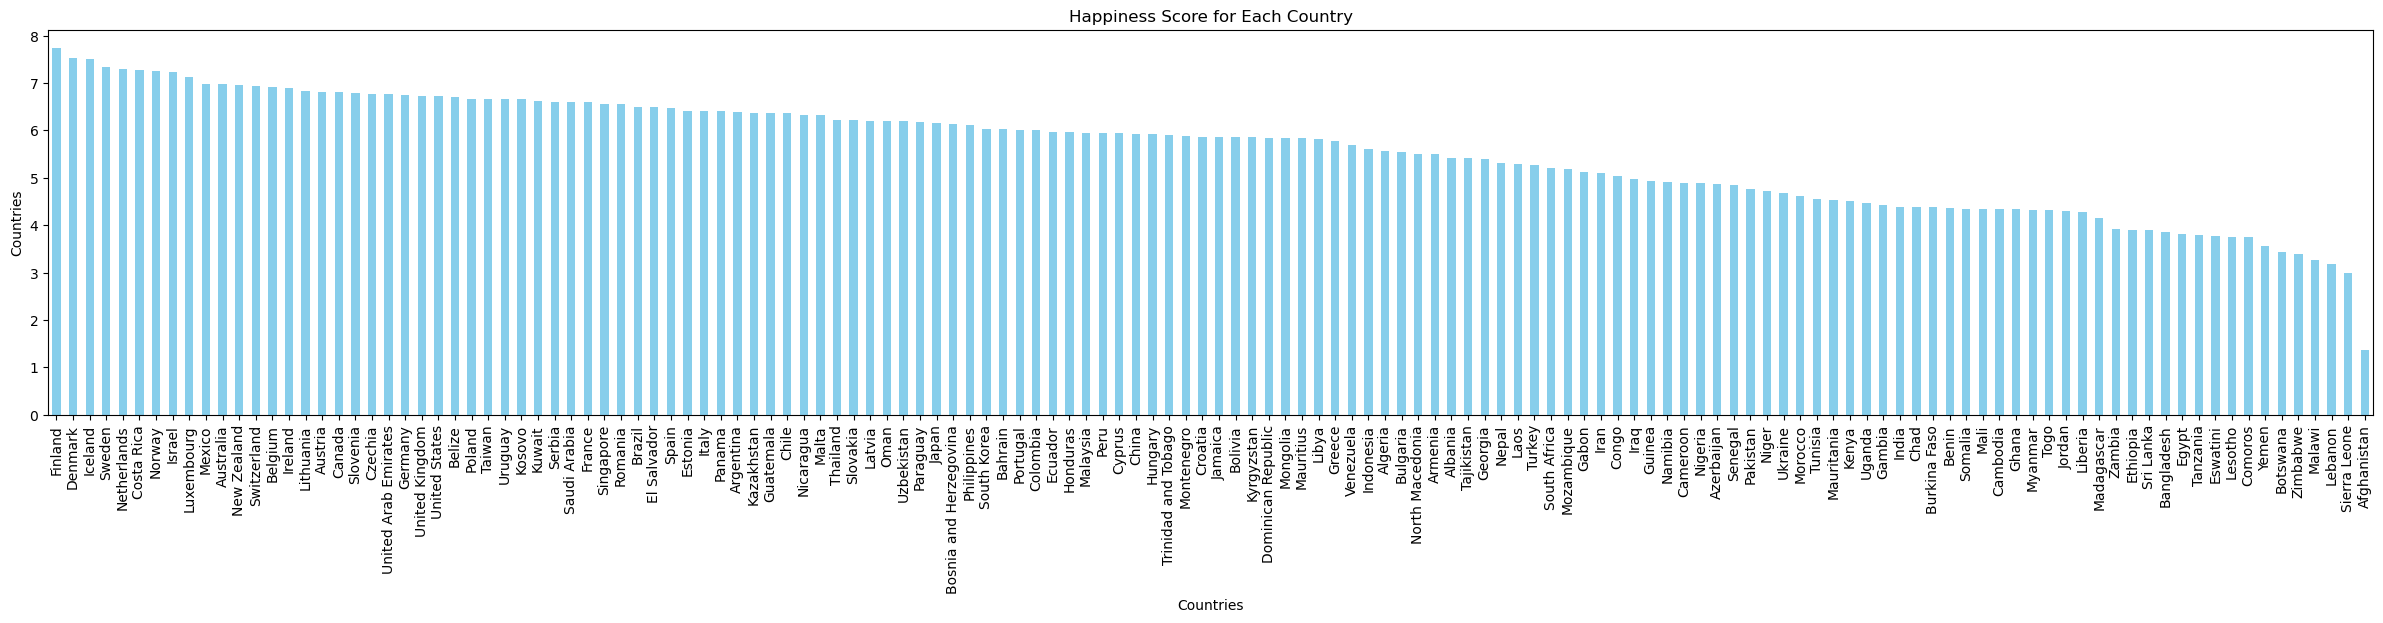

In [70]:
final_result_df_score_index = pd.read_csv("final_result.csv", index_col=1)
ax = final_result_df_score_index['Score'].plot(kind='bar', figsize=(30, 5), color='skyblue', title = "Happiness Score for Each Country")
ax.set_ylabel("Countries")


In [71]:
median_happiness_score = merged_df['Score'].median()
countries_above_median = merged_df.loc[merged_df['Score'] > median_happiness_score]
print(countries_above_median['Countries'].tolist())

['Finland', 'Denmark', 'Iceland', 'Sweden', 'Netherlands', 'Costa Rica', 'Norway', 'Israel', 'Luxembourg', 'Mexico', 'Australia', 'New Zealand', 'Switzerland', 'Belgium', 'Ireland', 'Lithuania', 'Austria', 'Canada', 'Slovenia', 'Czechia', 'United Arab Emirates', 'Germany', 'United Kingdom', 'United States', 'Belize', 'Poland', 'Taiwan', 'Uruguay', 'Kosovo', 'Kuwait', 'Serbia', 'Saudi Arabia', 'France', 'Singapore', 'Romania', 'Brazil', 'El Salvador', 'Spain', 'Estonia', 'Italy', 'Panama', 'Argentina', 'Kazakhstan', 'Guatemala', 'Chile', 'Nicaragua', 'Malta', 'Thailand', 'Slovakia', 'Latvia', 'Oman', 'Uzbekistan', 'Paraguay', 'Japan', 'Bosnia and Herzegovina', 'Philippines', 'South Korea', 'Bahrain', 'Portugal', 'Colombia', 'Ecuador', 'Honduras', 'Malaysia', 'Peru', 'Cyprus', 'China', 'Hungary', 'Trinidad and Tobago', 'Montenegro']


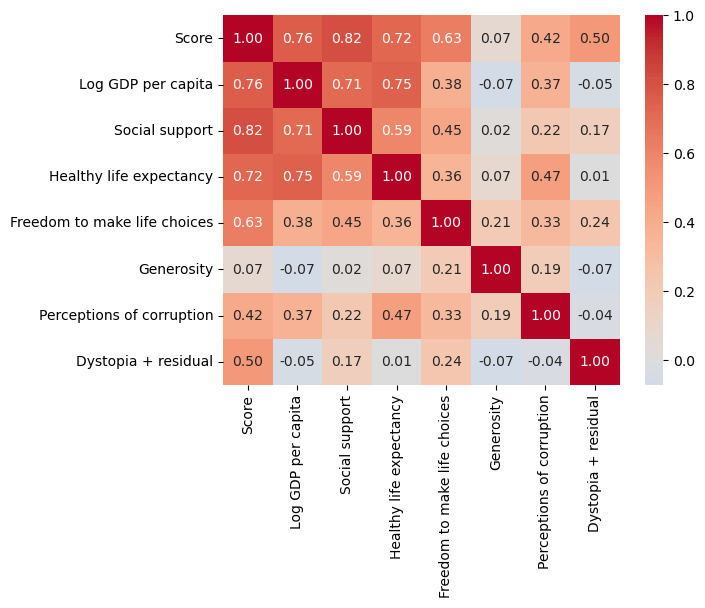

In [72]:
heatmap_df = merged_df.drop(['Overall rank', 'Countries', 'Continents'], axis=1)
ax = sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')